# Time Series Forecasting Exam

In this exam, you will work on a time series forecasting task. The goal is to go through the entire workflow from loading the data to evaluating the model and making predictions. Follow each step carefully. The dataset is stored in you can access it [here](https://www.kaggle.com/datasets/khaledzsa/traffic-dataset), the target is to predict `traffic_volume` column. There is also command to download the dataset below.

## Dataset: Traffic Dataset

### Dataset Overview:

- **Name**: Traffic Dataset
- **Description**: This dataset contains hourly data on the traffic volume for westbound I-94, a major interstate highway in the US that connects Minneapolis and St Paul, Minnesota. The data was collected by the Minnesota Department of Transportation (MnDOT) from 2012 to 2018 at a station roughly midway between the two cities.
- **Time Period**: Starting from 18-11-2016
- **Frequency**: Hourly observations

### Features:

1. **temp:** a numeric variable that shows the average temperature in kelvin.
2. **rain_1h:** a numeric variable that shows the amount of rain in mm that occurred in the hour.
3. **snow_1h:** a numeric variable that shows the amount of snow in mm that occurred in the hour.
4. **clouds_all:** a numeric variable that shows the percentage of cloud cover.
5. **weather_main:** a categorical variable that gives a short textual description of the current weather (such as Clear, Clouds, Rain, etc.).
6. **weather_description:** a categorical variable that gives a longer textual description of the current weather (such as light rain, overcast clouds, etc.).
7. **date_time:** a datetime variable that shows the hour of the data collected in local CST time.
8. **traffic_volume:** a numeric variable that shows the hourly I-94 reported westbound traffic volume.

#### Feel free to add or rearrange steps as you see fit to optimize your workflow. One additional note: the model's performance doesn't need to be 100% accurate. Instead, focus on achieving the best possible results while balancing performance and generalization.

## Load the Data

Load the time series dataset into a pandas DataFrame.

**Instructions:**
- Use `pandas` to load your dataset.
- Display the first few rows to understand its structure.
- Make sure the datetime column is correctly parsed.

In [85]:
# Here is a helping code that will download and unzip the dataset for you.
# Once you download the dataset you may comment the code!
!kaggle datasets download -d khaledzsa/traffic-dataset
!unzip traffic-dataset.zip

Dataset URL: https://www.kaggle.com/datasets/khaledzsa/traffic-dataset
License(s): unknown
traffic-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  traffic-dataset.zip
replace Traffic Data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [113]:
import pandas as pd
import numpy as np
# Import libraries
import os
from zipfile import ZipFile
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
import plotly.express as px

In [3]:
data = pd.read_csv('/content/Traffic Data.csv')

In [19]:
data.set_index('date_time', inplace=True)

In [20]:
data.head()

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description
date_time,,,,,,,
2017-08-27 01:00:00,1209.0,291.15,0.0,0.0,90,Mist,mist
2018-09-06 23:00:00,1248.0,286.01,0.0,0.0,1,Clear,sky is clear
2017-08-25 18:00:00,4602.0,293.69,0.0,0.0,75,Clouds,broken clouds
2017-11-09 22:00:00,2838.0,262.35,0.0,0.0,1,Clear,sky is clear
2017-11-09 15:00:00,5794.0,267.08,0.0,0.0,5,Clear,sky is clear


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   traffic_volume       19980 non-null  float64
 1   temp                 20000 non-null  float64
 2   rain_1h              20000 non-null  float64
 3   snow_1h              20000 non-null  float64
 4   clouds_all           20000 non-null  int64  
 5   weather_main         20000 non-null  object 
 6   weather_description  20000 non-null  object 
 7   date_time            20000 non-null  object 
dtypes: float64(4), int64(1), object(3)
memory usage: 1.2+ MB


In [6]:
data.describe()

,traffic_volume,temp,rain_1h,snow_1h,clouds_all
count,19980.000000,20000.000000,20000.000000,20000.0,20000.000000
mean,3278.186887,281.162680,0.048396,0.0,49.384600
std,1977.171357,12.661288,0.398007,0.0,39.647341
min,113.000000,243.390000,0.000000,0.0,0.000000
25%,1228.750000,271.950000,0.000000,0.0,1.000000
50%,3430.000000,281.825000,0.000000,0.0,75.000000
75%,4928.000000,291.840000,0.000000,0.0,90.000000
max,16781.000000,310.070000,10.600000,0.0,92.000000


## Exploratory Data Analysis (EDA)

Perform exploratory data analysis on the dataset.

**Instructions:**
- Plot the time series data.
- Analyze trends, seasonality, and potential outliers.
- Plot boxplots or scatter plots to identify any outliers or anomalies in the data.
- Seasonal Decomposition: Use `seasonal_decompose` from the `statsmodels` library to break down the time series data into trend, seasonality, and residual components. Analyze each component to gain insights into the long-term movement (trend), regular patterns (seasonality), and remaining fluctuations (residuals).

Do more if needed!

In [8]:
# EDA
data['weather_main'].unique()

array(['Mist', 'Clear', 'Clouds', 'Rain', 'Thunderstorm', 'Fog',
       'Drizzle', 'Snow', 'Haze', 'Smoke'], dtype=object)

In [116]:
weather_counts = data['weather_main'].value_counts().reset_index()
weather_counts.columns = ['Weather', 'Count']

fig = px.bar(weather_counts, x='Weather', y='Count', title='Weather Conditions')
fig.show()

In [109]:
data['weather_description'].unique()

array(['mist', 'sky is clear', 'broken clouds', 'moderate rain',
       'proximity shower rain', 'proximity thunderstorm', 'fog',
       'light rain', 'overcast clouds', 'light intensity drizzle',
       'scattered clouds', 'proximity thunderstorm with rain',
       'light snow', 'haze', 'few clouds', 'heavy intensity rain', 'snow',
       'drizzle', 'heavy intensity drizzle', 'thunderstorm',
       'Sky is Clear', 'heavy snow', 'thunderstorm with heavy rain',
       'light shower snow', 'shower drizzle',
       'thunderstorm with light rain', 'thunderstorm with rain',
       'thunderstorm with light drizzle',
       'proximity thunderstorm with drizzle', 'smoke',
       'light intensity shower rain', 'sleet', 'light rain and snow',
       'freezing rain'], dtype=object)

In [118]:
weather_desc_counts = data['weather_description'].value_counts().reset_index()
weather_desc_counts.columns = ['Weather Description', 'Count']
fig = px.bar(weather_desc_counts, x='Weather Description', y='Count', title='Weather Description ')

fig.update_layout(xaxis_tickangle=-45)
fig.show()

In [119]:
fig = px.box(data, x='weather_main', y='traffic_volume', title='Traffic Volume vs. Weather Condition',
             labels={'weather_main': 'Weather Condition', 'traffic_volume': 'Traffic Volume'})


fig.show()

In [12]:
data['date_time'] = pd.to_datetime(data['date_time'])

In [13]:
data

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time
0,1209.0,291.15,0.0,0.0,90,Mist,mist,2017-08-27 01:00:00
1,1248.0,286.01,0.0,0.0,1,Clear,sky is clear,2018-09-06 23:00:00
2,4602.0,293.69,0.0,0.0,75,Clouds,broken clouds,2017-08-25 18:00:00
3,2838.0,262.35,0.0,0.0,1,Clear,sky is clear,2017-11-09 22:00:00
4,5794.0,267.08,0.0,0.0,5,Clear,sky is clear,2017-11-09 15:00:00
...,...,...,...,...,...,...,...,...
19995,2723.0,296.42,0.0,0.0,40,Clouds,scattered clouds,2018-06-06 21:00:00
19996,5895.0,285.58,0.0,0.0,40,Clouds,scattered clouds,2017-10-25 15:00:00
19997,1132.0,275.30,0.0,0.0,1,Clear,sky is clear,2018-03-28 23:00:00
19998,5525.0,260.94,0.0,0.0,75,Clouds,broken clouds,2018-02-12 15:00:00


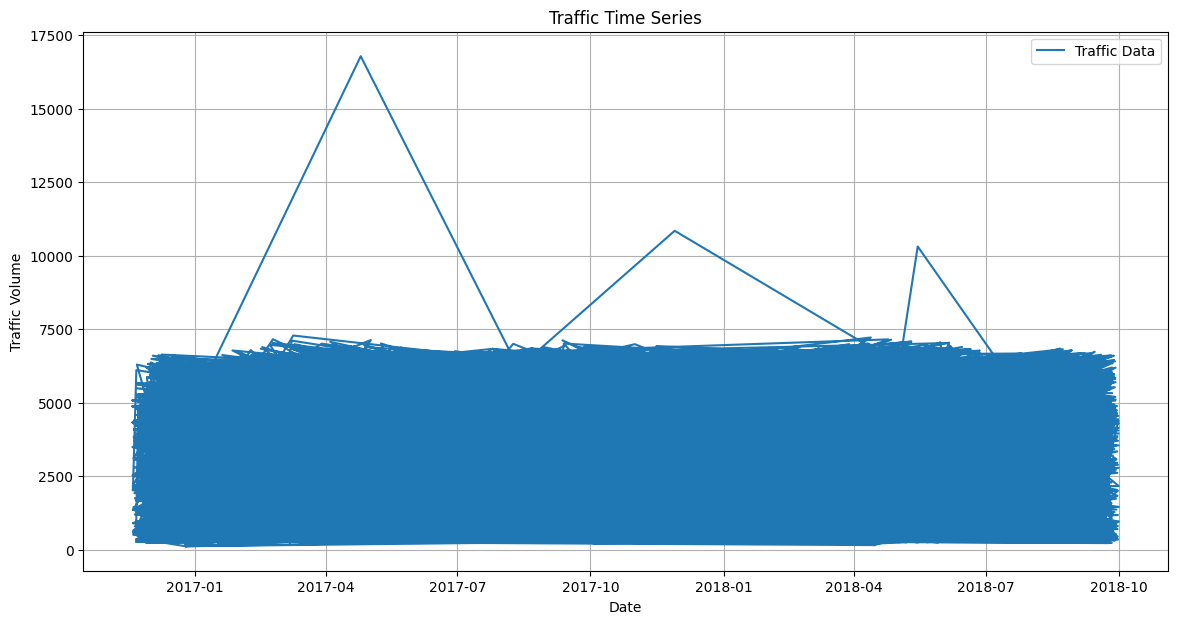

In [18]:
# Plot the time series data
plt.figure(figsize=(14, 7))
plt.plot(data['date_time'], data['traffic_volume'], label='Traffic Data')
plt.title('Traffic Time Series')
plt.xlabel('Date')
plt.ylabel('Traffic Volume')
plt.legend()
plt.grid(True)
plt.show()

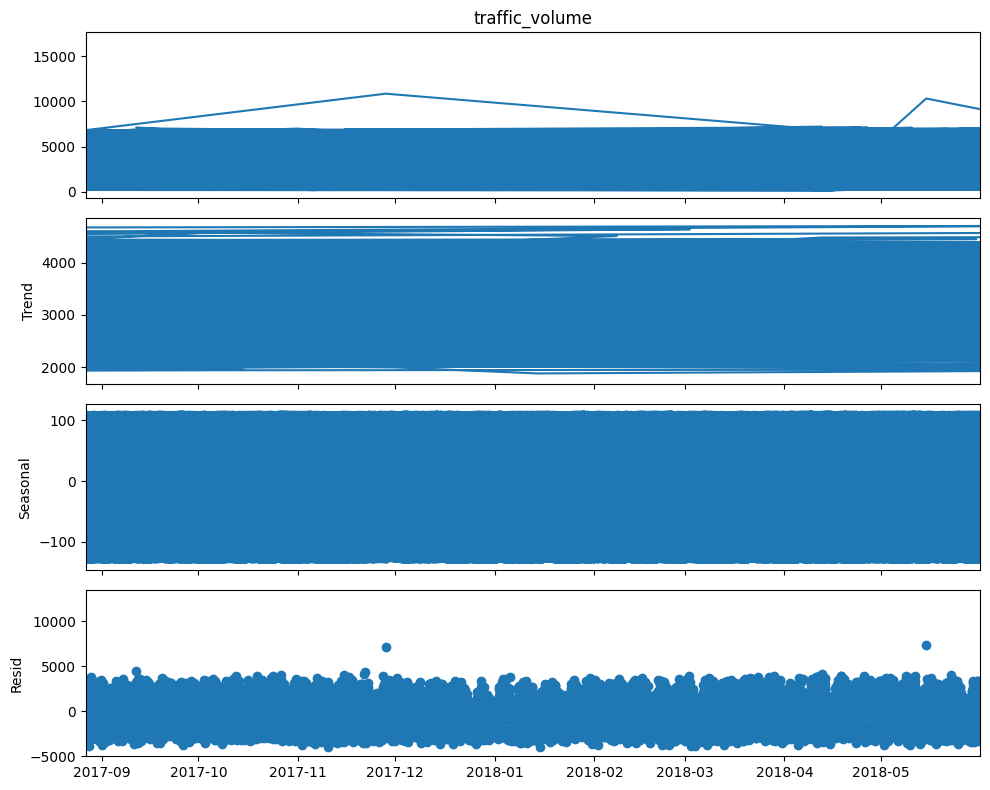

In [26]:
# Analyze trends, seasonality, and potential outliers.
result = seasonal_decompose(data['traffic_volume'], model='additive', period=24)  # Assuming daily seasonality


plt.rcParams.update({'figure.figsize': (10, 8)})
result.plot()
plt.show()

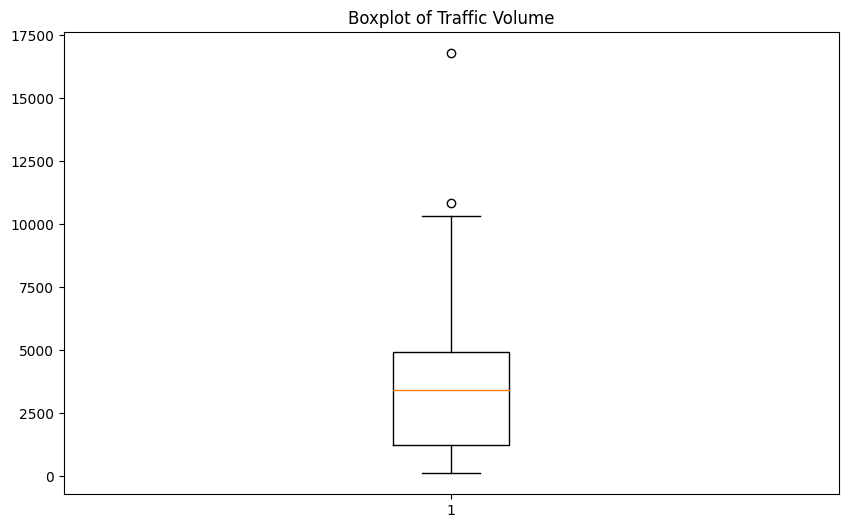

In [29]:
# outliers.
plt.figure(figsize=(10, 6))
plt.boxplot(data['traffic_volume'])
plt.title('Boxplot of Traffic Volume')
plt.show()

In [126]:
Q1 = data['traffic_volume'].quantile(0.25)
Q3 = data['traffic_volume'].quantile(0.75)

IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR # remove Outliers

In [124]:
data_cleaned = data[(data['traffic_volume'] >= lower_bound) & (data['traffic_volume'] <= upper_bound)]

In [125]:
fig = px.box(data_cleaned, x='weather_main', y='traffic_volume', title='Traffic Volume vs. Weather Condition (Without Outliers)',
             labels={'weather_main': 'Weather Condition', 'traffic_volume': 'Traffic Volume'})

fig.show()

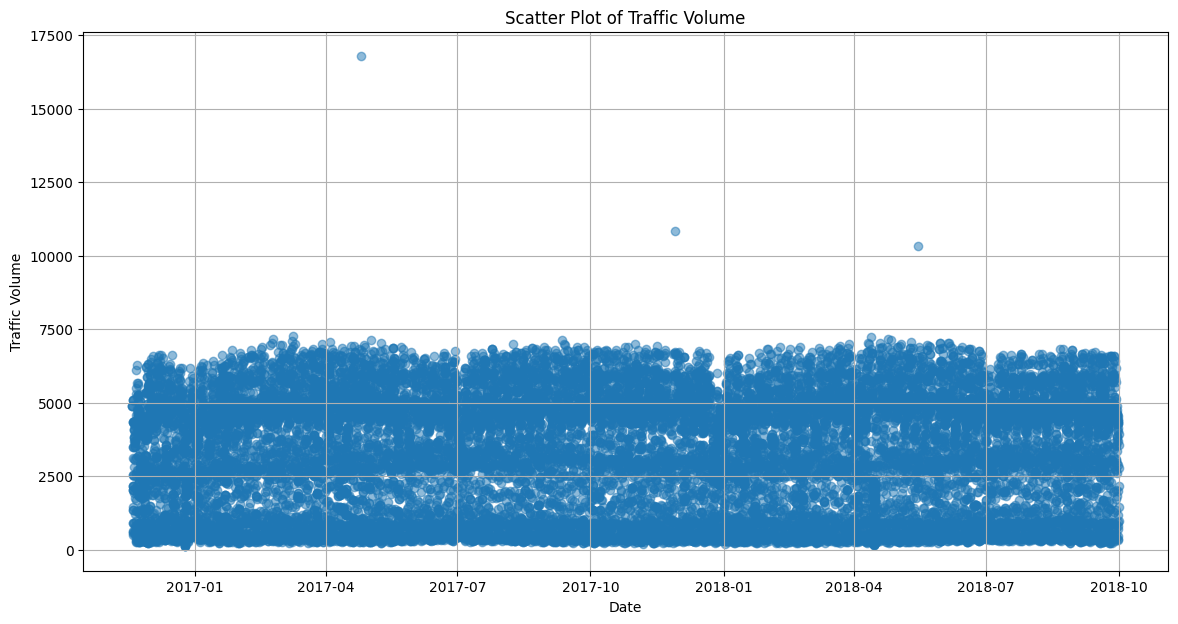

In [30]:
# Plot boxplots or scatter plots to identify any outliers or anomalies in the data
plt.figure(figsize=(14, 7))
plt.scatter(data.index, data['traffic_volume'], alpha=0.5)
plt.title('Scatter Plot of Traffic Volume')
plt.xlabel('Date')
plt.ylabel('Traffic Volume')
plt.grid(True)
plt.show()

## Data Preprocessing

Clean and preprocess the data.

**Instructions:**
- Handle any missing values in the dataset.
- If necessary, resample the data to ensure consistent time intervals.
- Create any additional features needed, such as lags or moving averages.
- Make sure that the dates are sorted correctly.

Do more if needed!

In [25]:
# cheack missing value
data.isna().sum()

,0
traffic_volume,0
temp,0
rain_1h,0
snow_1h,0
clouds_all,0
weather_main,0
weather_description,0


In [24]:
data['traffic_volume'].fillna(method='ffill', inplace=True)

<ipython-input-24-6be32dd022e6>:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['traffic_volume'].fillna(method='ffill', inplace=True)


In [27]:
data.duplicated().sum()

18

In [120]:
# resample the data to ensure consistent time intervals.
data_numeric = data.select_dtypes(include=['float64', 'int64'])
data_resampled = data_numeric.resample('D').mean()

In [121]:
print(data_resampled.head(10))

            traffic_volume        temp  rain_1h  snow_1h  clouds_all
date_time                                                           
2016-11-18     3397.000000  273.582500      0.0      0.0   85.000000
2016-11-19     2710.333333  271.048333      0.0      0.0   53.666667
2016-11-20     2231.500000  269.565000      0.0      0.0   36.500000
2016-11-21     3265.666667  271.654583      0.0      0.0    6.041667
2016-11-22     3273.807692  274.069423      0.0      0.0   81.442308
2016-11-23     3074.862745  274.222353      0.0      0.0   90.000000
2016-11-24     2219.190476  274.496667      0.0      0.0   89.642857
2016-11-25     2011.300000  274.297333      0.0      0.0   80.100000
2016-11-26     1936.157895  273.642632      0.0      0.0    9.605263
2016-11-27     2014.472727  274.219273      0.0      0.0   79.981818


In [35]:
data_resampled['traffic_volume_lag1'] = data_resampled['traffic_volume'].shift(1)
data_resampled['traffic_volume_lag7'] = data_resampled['traffic_volume'].shift(7)
# Moving Averages /
data_resampled['traffic_volume_ma7'] = data_resampled['traffic_volume'].rolling(window=7).mean()
data_resampled['traffic_volume_ma30'] = data_resampled['traffic_volume'].rolling(window=30).mean()


In [44]:
print(data_resampled.head(10))

            traffic_volume        temp  rain_1h  snow_1h  clouds_all  \
date_time                                                              
2016-11-18     3397.000000  273.582500      0.0      0.0   85.000000   
2016-11-19     2710.333333  271.048333      0.0      0.0   53.666667   
2016-11-20     2231.500000  269.565000      0.0      0.0   36.500000   
2016-11-21     3265.666667  271.654583      0.0      0.0    6.041667   
2016-11-22     3273.807692  274.069423      0.0      0.0   81.442308   
2016-11-23     3074.862745  274.222353      0.0      0.0   90.000000   
2016-11-24     2219.190476  274.496667      0.0      0.0   89.642857   
2016-11-25     2011.300000  274.297333      0.0      0.0   80.100000   
2016-11-26     1936.157895  273.642632      0.0      0.0    9.605263   
2016-11-27     2014.472727  274.219273      0.0      0.0   79.981818   

            traffic_volume_lag1  traffic_volume_lag7  traffic_volume_ma7  \
date_time                                                  

In [43]:
data_resampled.isna().sum()

,0
traffic_volume,0
temp,0
rain_1h,0
snow_1h,0
clouds_all,0
traffic_volume_lag1,1
traffic_volume_lag7,7
traffic_volume_ma7,6
traffic_volume_ma30,29


In [39]:
data_resampled['traffic_volume_lag1'].fillna(method='ffill', inplace=True)

<ipython-input-39-9e851c659fa3>:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_resampled['traffic_volume_lag1'].fillna(method='ffill', inplace=True)


In [42]:
data_resampled['traffic_volume_lag7'].fillna(method='ffill',inplace =True)

<ipython-input-42-ada16f6d818f>:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_resampled['traffic_volume_lag7'].fillna(method='ffill',inplace =True)


In [ ]:
data_resampled['traffic_volume_ma30']

In [46]:
# Make sure that the dates are sorted correctly.
data_resampled.sort_index(inplace=True)

# data_resampled.sort_values(by='date_time_column_name', inplace=True)

In [47]:
print(data_resampled.head(10))

            traffic_volume        temp  rain_1h  snow_1h  clouds_all  \
date_time                                                              
2016-11-18     3397.000000  273.582500      0.0      0.0   85.000000   
2016-11-19     2710.333333  271.048333      0.0      0.0   53.666667   
2016-11-20     2231.500000  269.565000      0.0      0.0   36.500000   
2016-11-21     3265.666667  271.654583      0.0      0.0    6.041667   
2016-11-22     3273.807692  274.069423      0.0      0.0   81.442308   
2016-11-23     3074.862745  274.222353      0.0      0.0   90.000000   
2016-11-24     2219.190476  274.496667      0.0      0.0   89.642857   
2016-11-25     2011.300000  274.297333      0.0      0.0   80.100000   
2016-11-26     1936.157895  273.642632      0.0      0.0    9.605263   
2016-11-27     2014.472727  274.219273      0.0      0.0   79.981818   

            traffic_volume_lag1  traffic_volume_lag7  traffic_volume_ma7  \
date_time                                                  

In [72]:
print(data_resampled.head(10))

            traffic_volume        temp  rain_1h  snow_1h  clouds_all  \
date_time                                                              
2016-11-18     3397.000000  273.582500      0.0      0.0   85.000000   
2016-11-19     2710.333333  271.048333      0.0      0.0   53.666667   
2016-11-20     2231.500000  269.565000      0.0      0.0   36.500000   
2016-11-21     3265.666667  271.654583      0.0      0.0    6.041667   
2016-11-22     3273.807692  274.069423      0.0      0.0   81.442308   
2016-11-23     3074.862745  274.222353      0.0      0.0   90.000000   
2016-11-24     2219.190476  274.496667      0.0      0.0   89.642857   
2016-11-25     2011.300000  274.297333      0.0      0.0   80.100000   
2016-11-26     1936.157895  273.642632      0.0      0.0    9.605263   
2016-11-27     2014.472727  274.219273      0.0      0.0   79.981818   

            traffic_volume_lag1  traffic_volume_lag7  traffic_volume_ma7  \
date_time                                                  

## Feature Engineering

### Instructions:
  
- **Shift Method**: Use the `shift` method to create a new column `prev_traffic_volume`, which represents the previous day's traffic volume.

- **Difference between traffic_volume**: Calculate the difference between the values in `traffic_volume` column to highlight short-term volume.

- **Date Features**: Extract meaningful time-based features from the `date_time` column to enhance the model's ability to detect temporal patterns. These features include:
  - **Day of the week**: To capture weekly seasonality.
  - **Month**: To capture monthly trends.
  - **Day of the year**: Useful for modeling yearly seasonality.


In [73]:
# create a new column prev_traffic_volume
data_resampled['prev_traffic_volume'] = data_resampled['traffic_volume'].shift(1)

In [74]:
print(data_resampled[['traffic_volume', 'prev_traffic_volume']].head(10))

            traffic_volume  prev_traffic_volume
date_time                                      
2016-11-18     3397.000000                  NaN
2016-11-19     2710.333333          3397.000000
2016-11-20     2231.500000          2710.333333
2016-11-21     3265.666667          2231.500000
2016-11-22     3273.807692          3265.666667
2016-11-23     3074.862745          3273.807692
2016-11-24     2219.190476          3074.862745
2016-11-25     2011.300000          2219.190476
2016-11-26     1936.157895          2011.300000
2016-11-27     2014.472727          1936.157895


In [75]:
data_resampled['prev_traffic_volume'].fillna(0, inplace=True)

print(data_resampled[['traffic_volume', 'prev_traffic_volume']].head(10))

            traffic_volume  prev_traffic_volume
date_time                                      
2016-11-18     3397.000000             0.000000
2016-11-19     2710.333333          3397.000000
2016-11-20     2231.500000          2710.333333
2016-11-21     3265.666667          2231.500000
2016-11-22     3273.807692          3265.666667
2016-11-23     3074.862745          3273.807692
2016-11-24     2219.190476          3074.862745
2016-11-25     2011.300000          2219.190476
2016-11-26     1936.157895          2011.300000
2016-11-27     2014.472727          1936.157895


In [76]:
data_resampled['traffic_volume_diff'] = data_resampled['traffic_volume'].diff()

print(data_resampled[['traffic_volume', 'traffic_volume_diff']].head(10))

            traffic_volume  traffic_volume_diff
date_time                                      
2016-11-18     3397.000000                  NaN
2016-11-19     2710.333333          -686.666667
2016-11-20     2231.500000          -478.833333
2016-11-21     3265.666667          1034.166667
2016-11-22     3273.807692             8.141026
2016-11-23     3074.862745          -198.944947
2016-11-24     2219.190476          -855.672269
2016-11-25     2011.300000          -207.890476
2016-11-26     1936.157895           -75.142105
2016-11-27     2014.472727            78.314833


In [77]:
data_resampled['traffic_volume_diff'].fillna(0, inplace=True)
print(data_resampled[['traffic_volume', 'traffic_volume_diff']].head(10))

            traffic_volume  traffic_volume_diff
date_time                                      
2016-11-18     3397.000000             0.000000
2016-11-19     2710.333333          -686.666667
2016-11-20     2231.500000          -478.833333
2016-11-21     3265.666667          1034.166667
2016-11-22     3273.807692             8.141026
2016-11-23     3074.862745          -198.944947
2016-11-24     2219.190476          -855.672269
2016-11-25     2011.300000          -207.890476
2016-11-26     1936.157895           -75.142105
2016-11-27     2014.472727            78.314833


In [122]:
data_resampled['day_of_week'] = data_resampled.index.dayofweek # week
data_resampled['month'] = data_resampled.index.month # month
data_resampled['day_of_year'] = data_resampled.index.dayofyear # year

print(data_resampled[['day_of_week', 'month', 'day_of_year']].head(10))


            day_of_week  month  day_of_year
date_time                                  
2016-11-18            4     11          323
2016-11-19            5     11          324
2016-11-20            6     11          325
2016-11-21            0     11          326
2016-11-22            1     11          327
2016-11-23            2     11          328
2016-11-24            3     11          329
2016-11-25            4     11          330
2016-11-26            5     11          331
2016-11-27            6     11          332


## Train-Test Split

Split the dataset into training and testing sets.

**Instructions:**
- Ensure the split maintains the time order of the data.
- Decide on an appropriate ratio for splitting the data.

In [79]:
train_ratio = 0.8
train_size = int(len(data_resampled) * train_ratio)
train_data = data_resampled.iloc[:train_size]
test_data = data_resampled.iloc[train_size:]


print(f'Training data size: {train_data.shape}')
print(f'Test data size: {test_data.shape}')


Training data size: (545, 14)
Test data size: (137, 14)


## Feature Scaling

Apply feature scaling to the data if needed.

**Instructions:**
- Use a scaling method such as MinMaxScaler or StandardScaler.
- Ensure scaling is applied correctly to both training and testing data.

In [80]:
scaler = MinMaxScaler()

In [81]:
train_scaled = scaler.fit_transform(train_data)
test_scaled = scaler.transform(test_data)

In [82]:
train_scaled_df = pd.DataFrame(train_scaled, columns=train_data.columns, index=train_data.index)
test_scaled_df = pd.DataFrame(test_scaled, columns=test_data.columns, index=test_data.index)

In [83]:
data_resampled.fillna(0, inplace=True)

In [84]:
print(train_scaled_df.head())

            traffic_volume      temp  rain_1h  snow_1h  clouds_all  \
date_time                                                            
2016-11-18        0.660969  0.469867      0.0      0.0    0.941416   
2016-11-19        0.459961  0.421350      0.0      0.0    0.590253   
2016-11-20        0.319793  0.392951      0.0      0.0    0.397860   
2016-11-21        0.622524  0.432957      0.0      0.0    0.056504   
2016-11-22        0.624907  0.479189      0.0      0.0    0.901544   

            traffic_volume_lag1  traffic_volume_lag7  traffic_volume_ma7  \
date_time                                                                  
2016-11-18             0.000000                  0.0                 0.0   
2016-11-19             0.745746                  0.0                 0.0   
2016-11-20             0.595002                  0.0                 0.0   
2016-11-21             0.489883                  0.0                 0.0   
2016-11-22             0.716914                  0.0 

## Models Selection

Choose two models for time series forecasting.

**Instructions:**
- Select two models such as ARIMA, SARIMA, RNN, LSTM, or GRU.
- Train these models and then compare their performance.

In [89]:
# RNN
train_data_array = train_scaled_df.values
test_data_array = test_scaled_df.values #>> transformation

In [90]:
def create_sequences(data, n_steps):
    X, y = [], []
    for i in range(len(data) - n_steps):
        X.append(data[i:i+n_steps, :])
        y.append(data[i+n_steps, 0]) # >> travic valume
    return np.array(X), np.array(y)

In [92]:
n_steps = 10
X_train, y_train = create_sequences(train_data_array, n_steps)
X_test, y_test = create_sequences(test_data_array, n_steps)


In [93]:
print(X_train.shape, y_train.shape)

(535, 10, 14) (535,)


In [94]:
from tensorflow.keras.layers import Dense, SimpleRNN

In [142]:
model = Sequential()
model.add(SimpleRNN(50, activation='relu', input_shape=(n_steps, X_train.shape[2])))
model.add(Dense(25, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [143]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_4 (SimpleRNN)             │ (None, 50)                  │           3,250 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 25)                  │           1,275 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 10)                  │             260 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 1)                   │              11 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,798 (18.74 KB)

 Trainable params: 4,798 (18.74 KB)

 Non-trainable params: 0 (0.00 B)

### Model 1 Training

Train your first model on the training dataset.

**Instructions:**
- Fit the first model to the training data.
- Ensure to monitor the training process.

In [144]:
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2, verbose=1)

Epoch 1/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0442 - val_loss: 0.0374
Epoch 2/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0226 - val_loss: 0.0283
Epoch 3/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0195 - val_loss: 0.0264
Epoch 4/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0177 - val_loss: 0.0255
Epoch 5/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0162 - val_loss: 0.0238
Epoch 6/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0146 - val_loss: 0.0233
Epoch 7/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0145 - val_loss: 0.0241
Epoch 8/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0143 - val_loss: 0.0216
Epoch 9/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0127 - val_loss: 0.0193
Epoch 10/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0099 - val_loss: 0.0192


### Make 1 Predictions

Generate predictions on the test dataset.

### Instructions:
- Use the trained model to make predictions on the test data.
- Store the predictions for further analysis.

In [145]:
y_pred = model.predict(X_test)

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


### Model 1 Evaluation

Evaluate the performance of your first model on the test dataset.

**Instructions:**
- Calculate evaluation metrics such as MAE, MSE, RMSE, or MAPE.
- Plot the predicted vs actual values for the test set.
- Plot the loss and the validation loss.

In [146]:
test_loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0117 
Test Loss: 0.014411001466214657


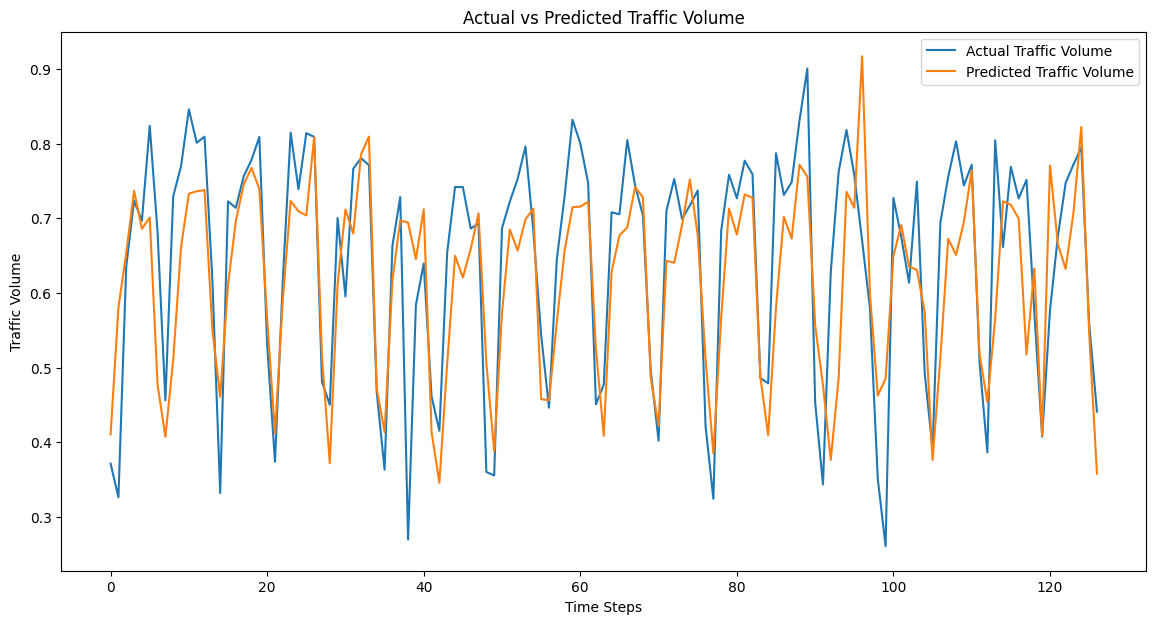

In [100]:
# this is plot
plt.figure(figsize=(14, 7))
plt.plot(y_test, label='Actual Traffic Volume')
plt.plot(y_pred, label='Predicted Traffic Volume')
plt.title('Actual vs Predicted Traffic Volume')
plt.xlabel('Time Steps')
plt.ylabel('Traffic Volume')
plt.legend()
plt.show()

### Model 2 Training

Train your second model on the training dataset.

**Instructions:**
- Fit the second model to the training data.
- Ensure to monitor the training process.

In [101]:
# LSTM
from tensorflow.keras.layers import Dense, LSTM

In [147]:
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, X_train.shape[2])))
model.add(Dense(25, activation='relu'))
model.add(Dense(1))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [148]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 50)                  │          13,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 25)                  │           1,275 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 1)                   │              26 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,303 (55.87 KB)

 Trainable params: 14,303 (55.87 KB)

 Non-trainable params: 0 (0.00 B)

fit model

In [149]:
history = model.fit(X_train, y_train, epochs=5, validation_split=0.2, verbose=1)

Epoch 1/5
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.2416 - val_loss: 0.0482
Epoch 2/5
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0518 - val_loss: 0.0513
Epoch 3/5
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0343 - val_loss: 0.0371
Epoch 4/5
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0288 - val_loss: 0.0383
Epoch 5/5
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0268 - val_loss: 0.0360


### Make 2 Predictions

Generate predictions on the test dataset.

### Instructions:
- Use the trained model to make predictions on the test data.
- Store the predictions for further analysis.

In [150]:
y_pred = model.predict(X_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


### Model 2 Evaluation

Evaluate the performance of your second model on the test dataset.

**Instructions:**
- Calculate evaluation metrics such as MAE, MSE, RMSE, or MAPE.
- Plot the predicted vs actual values for the test set.
- Plot the loss and the validation loss.

In [151]:
test_loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0264 
Test Loss: 0.02551751211285591


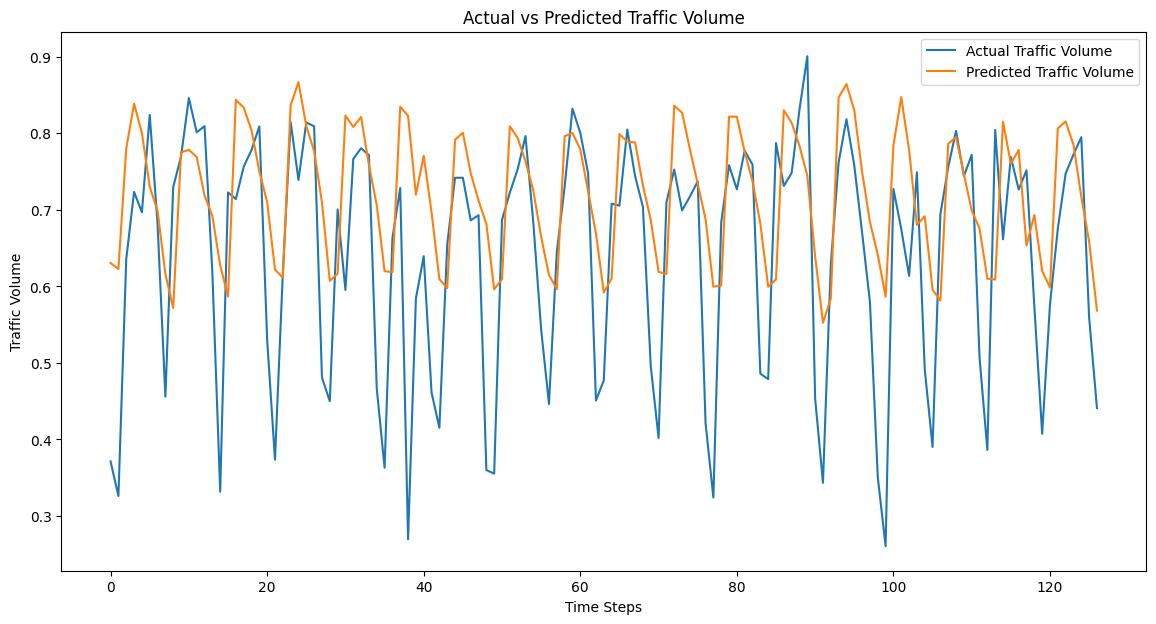

In [108]:
plt.figure(figsize=(14, 7))
plt.plot(y_test, label='Actual Traffic Volume')
plt.plot(y_pred, label='Predicted Traffic Volume')
plt.title('Actual vs Predicted Traffic Volume')
plt.xlabel('Time Steps')
plt.ylabel('Traffic Volume')
plt.legend()
plt.show()

## Project Questions:

1. **Data Preprocessing**: Explain why you chose your specific data preprocessing techniques (e.g., normalization, handling missing values). How did these techniques help prepare the data for training the model?
2. **Feature Engineering**: Did you perform any feature engineering or transformations? Describe your decisions and how these new features (or transformed features) contributed to the forecasting model.
3. **Model Architecture**: Describe the reasoning behind your model’s architecture (e.g., the type of model, layers, number of neurons, and activation functions). Why did you believe this architecture was appropriate for time series forecasting?
4. **Training Process**: Discuss why you chose your batch size, number of epochs, and optimizer. How did these choices affect the training process? Did you experiment with different values, and what were the outcomes?
5. **Loss Function and Metrics**: Why did you choose the specific loss function and evaluation metrics (e.g., MAE, RMSE, MAPE)? How do they align with the objective of forecasting?
6. **Model Tuning (If Done)**: Describe any tuning you performed (e.g., hyperparameter tuning) and why you felt it was necessary. How did these adjustments improve model performance?
7. **Overfitting and Underfitting**: Analyze whether the model encountered any overfitting or underfitting during training. What strategies could you implement to mitigate these issues?
8. **Future Improvements**: Suggest potential improvements or further steps you could take to enhance model performance. Consider using different algorithms, feature engineering techniques, or tuning hyperparameters.


### Answer Here:
1 - In the beginning, I transformed the understanding of the data through graphs. I filled in the empty values ​​and deleted the outliers,Delete duplicate values
2 -Yes, I ran many, but I did not use them in forecasting. My focus was on traffic value
3 -I used the rnn model, LSTM. It is possible to work with more than one model, and I did not add new layers. If there is enough time, they may change.
4 - I am still conducting many experiments to find an ideal solution. I believe there is a better one, and I am working to find it in the solution
5-There are many here but we want prediction so for me it is probably the best option
6-I may adjust more if I have enough time. After answering the question, it may change
7-Yes, it seems to me that I am facing a problem, and I will improve the data or look for the reason
8- I will modify the valid data and adjust the number of layers

